In [19]:
from collections import defaultdict
import nltk
from nltk import stem

snowball = stem.snowball.EnglishStemmer()


In [20]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences

class POSTagger(object):
    def __init__(self):
        pass
        
    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos

In [21]:
splitter = Splitter()
postagger = POSTagger()

In [22]:
sanders = pd.read_csv('data/sanders_scores.csv')

In [27]:
len(sanders['Comment'].values)

11958

In [28]:
splitted_sentences = splitter.split(text)
pos_tagged_sentences = postagger.pos_tag(splitted_sentences)

In [ ]:
stem_words = defaultdict(list)

for k, v in pos_dict.items():
    stem_words[snowball.stem(k)].append((k, v))

stem_words['nice']

In [ ]:
#Use sorted dictionaries?
#pos_dict_sorted = OrderedDict(sorted(pos_dict.items(), key=lambda t: t[0]))
#neg_dict_sorted = OrderedDict(sorted(neg_dict.items(), key=lambda t: t[0]))

In [ ]:
#### SentiWordNet lexicons
import json
# json.dump(pos_dict, open("dicts/pos_dict", 'w'))
# json.dump(neg_dict, open("dicts/neg_dict", 'w'))

pos_dict = defaultdict(int, json.load(open('dicts/pos_dict')))
neg_dict = defaultdict(int, json.load(open('dicts/neg_dict')))

In [1]:
import xmltodict

with open('sentiment.xml') as fd:
    obj = xmltodict.parse(fd.read())

In [14]:
words = []
polarity = []
for i in obj['sentiment']['word']:
    words.append(i['@form'])
    polarity.append(i['@polarity'])

In [15]:
from itertools import *

In [18]:
pattern_dict = pd.DataFrame(list(izip(words, polarity)))
pattern_dict.columns = ['Word', 'Polarity']

In [23]:
from nltk.tokenize import word_tokenize
import nltk.pos_tag
text = word_tokenize("And now for something completely different")
nltk.data.load(nltk.tag._POS_TAGGER)
nltk.pos_tag(text)

ImportError: No module named pos_tag

In [20]:
#positives = pattern_dict[pattern_dict['Polarity'] <]

In [ ]:
def cal_senti_score(pos_tagged_sentences):
    incrementers = ['too', 'very', 'sorely', 'painfully', 'greatly', 'woefully', 'extremely', 'greatly', 'more']
    decrementers = ['barely', 'little', 'less', 'hardly', 'scarcely', 'rarely']
    
    score = []
    
    for sent in pos_tagged_sentences:
        pos_score = []
        neg_score = []
        total = len(sent)
  
        for i, token in enumerate(sent):    
            if pos_dict.get(token[0]) == None:
                pass
            if i == 0:
                pos_score.append(pos_dict[token[0]])
            else:
                previous_token = sent[i-1][0]

                if previous_token in incrementers:
                        pos_score.append(pos_dict[token[0]]*2.)

                elif previous_token in decrementers:

                    pos_score.append(pos_dict[token[0]]/2.)
                else:
                    pos_score.append(pos_dict[token[0]])
                        
        for i, token in enumerate(sent):    
            if neg_dict.get(token[0]) == None:
                pass
            if i == 0:
                neg_score.append(neg_dict[token[0]])
            else:
                previous_token = sent[i-1][0]
    
                if previous_token in incrementers:
                    neg_score.append(neg_dict[token[0]]*2.)

                elif previous_token in decrementers:

                    neg_score.append(neg_dict[token[0]]/2.)
                else:
                    neg_score.append(neg_dict[token[0]])

        sent_score = (sum(pos_score) - sum(neg_score)) / float(total) 
        print pos_score
        print neg_score
    
        score.append(sent_score)
    return sum(score) / float(len(score))

In [ ]:
cal_senti_score(pos_tagged_sentences)

In [ ]:
text ="What can I say about this place. \
The staff of the restaurant is nice and the eggplant is not bad. \
Apart from that, very uninspired food, lack of atmosphere and too expensive. \
I am a staunch vegetarian and was sorely dissapointed with the veggie options on the menu. \
Will be the last time I visit, I recommend others to avoid."

### Using PATTERN

In [16]:
from pattern.en import sentiment, polarity, subjectivity
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

In [ ]:
hilary = pd.read_csv('data/hilary_comments')
hilary['Sentiment'] = hilary.apply(lambda row: sentiment(row['Comment']), axis = 1)
hilary['Subjectivity'] = hilary.apply(lambda row: subj(row['Comment']), axis = 1)
hilary.to_csv('hilary_scores')

sanders = pd.read_csv('data/sanders_comments')
sanders['Sentiment'] = sanders.apply(lambda row: sentiment(row['Comment']), axis = 1)
sanders['Subjectivity'] = sanders.apply(lambda row: subj(row['Comment']), axis = 1)
sanders.to_csv('sanders_scores')
#df['Value'] = df.apply(lambda row: my_test(row['a'], row['c']), axis=1)
#hilary['Binary'] = hilary['Sentiment']

In [57]:
biden = pd.read_csv('data/biden_comments')
biden['Sentiment'] = biden.apply(lambda row: sentiment(row['Comment']), axis = 1)
biden['Subjectivity'] = biden.apply(lambda row: subj(row['Comment']), axis = 1)
biden.to_csv('biden_scores')

In [58]:
trump = pd.read_csv('data/trump_comments')
trump['Sentiment'] = trump.apply(lambda row: sentiment(row['Comment']), axis = 1)
trump['Subjectivity'] = trump.apply(lambda row: subj(row['Comment']), axis = 1)
trump.to_csv('trump_scores')

In [59]:
bush = pd.read_csv('data/bush_comments')
bush['Sentiment'] = bush.apply(lambda row: sentiment(row['Comment']), axis = 1)
bush['Subjectivity'] = bush.apply(lambda row: subj(row['Comment']), axis = 1)
bush.to_csv('bush_scores')

In [60]:
carson = pd.read_csv('data/carson_comments')
carson['Sentiment'] = carson.apply(lambda row: sentiment(row['Comment']), axis = 1)
carson['Subjectivity'] = carson.apply(lambda row: subj(row['Comment']), axis = 1)
carson.to_csv('carson_scores')

In [35]:
hilary['Comment'][1046]

"Bush dynasty goes back to Prescott Bush, a senator for CT in 1950.  G.H.W. Bush, Jeb, and George W. have all held elective office since the 1970 through 2008.<br/><br/>The Clinton dynasty is Bill Clinton as governor of Arkansas, then President.  Hillary was elected to the Senate from NY in 2000.  That's it.<br/><br/>There is no Clinton dynasty."

In [ ]:
def binarizer(dataframe):
    data = pd.read_csv('data/'+ dataframe +'_comments')

In [95]:
for c in candidates:
    data = pd.read_csv('data/'+c+'_comments')
    data['Sentiment'] = data.apply(lambda row: sentiment(row['Comment']), axis = 1)
    data['Sentiment_b'] = data['Sentiment'] >= 0
    data['Sentiment_b'] = data['Sentiment_b'].astype(int) 
    data['Subjectivity'] = data.apply(lambda row: subj(row['Comment']), axis = 1)
    data['Subjectivity_b'] = data['Subjectivity'] >= 0
    data['Subjectivity_b'] = data['Subjectivity_b'].astype(int) 
    data.to_csv('data/'+c+'_scores.csv')

In [299]:
hilary = pd.read_csv('data/hilary_scores.csv')
sanders = pd.read_csv('data/sanders_scores.csv')
biden = pd.read_csv('data/biden_scores.csv')

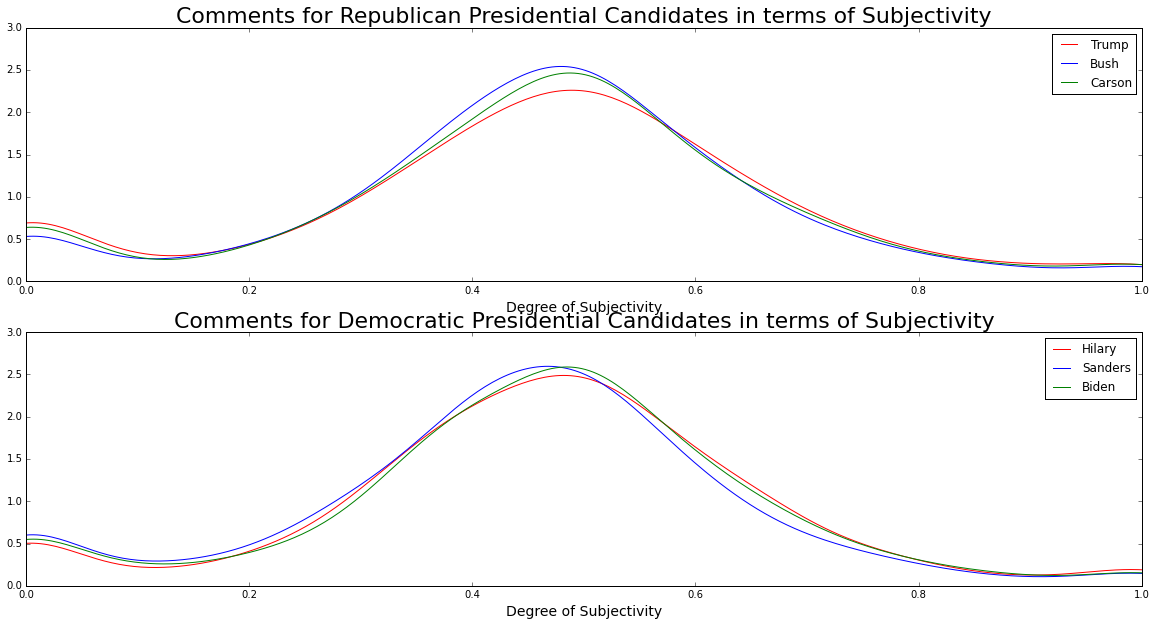

In [142]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
data = trump['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Trump')

data1 = bush['Subjectivity']
density1 = gaussian_kde(data1)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.plot(xs,density1(xs), color = 'b', label = 'Bush')

data2 = carson['Subjectivity']
density2 = gaussian_kde(data2)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs,density2(xs), color = 'g', label = 'Carson')
plt.legend(loc='upper right')
plt.xlabel('Degree of Subjectivity', fontsize=14)
plt.title('Comments for Republican Presidential Candidates in terms of Subjectivity', fontsize=22)

plt.subplot(2,1,2)
data = hilary['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Hilary')

data1 = sanders['Subjectivity']
density1 = gaussian_kde(data1)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.plot(xs,density1(xs), color = 'b', label = 'Sanders')

data2 = biden['Subjectivity']
density2 = gaussian_kde(data2)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs,density2(xs), color = 'g', label = 'Biden')
plt.legend(loc='upper right')
plt.xlabel('Degree of Subjectivity', fontsize=14)
plt.title('Comments for Democratic Presidential Candidates in terms of Subjectivity', fontsize=22)

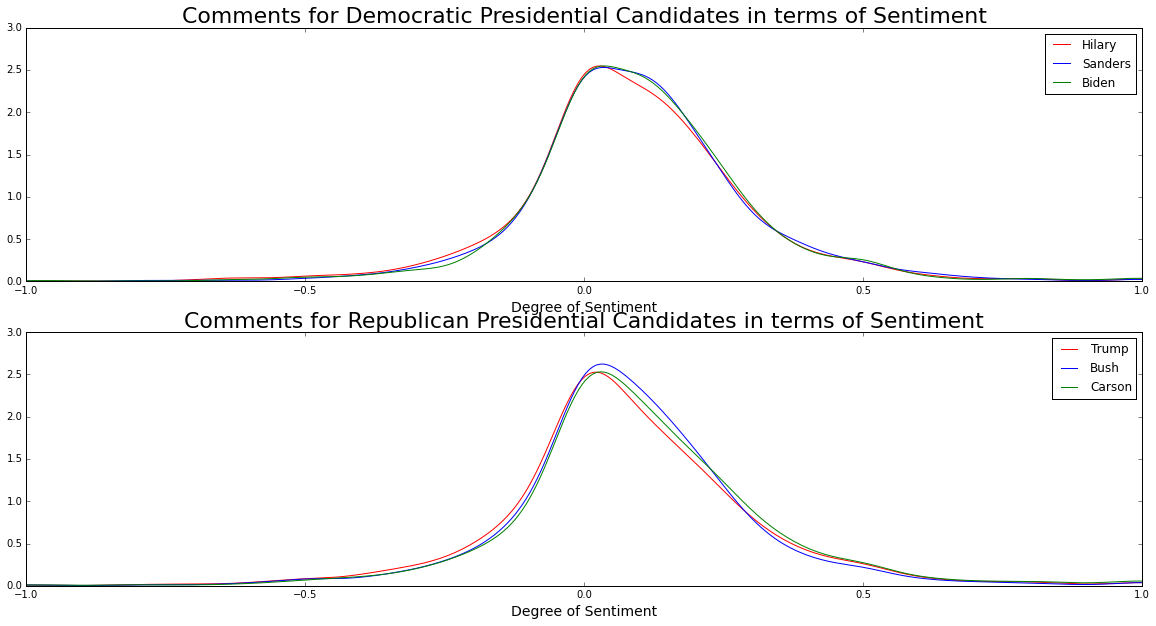

In [139]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
data = hilary['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Hilary')

data1 = sanders['Sentiment']
density1 = gaussian_kde(data1)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.plot(xs,density1(xs), color = 'b', label = 'Sanders')

data2 = biden['Sentiment']
density2 = gaussian_kde(data2)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs,density2(xs), color = 'g', label = 'Biden')
plt.legend(loc='upper right')
plt.xlabel('Degree of Sentiment', fontsize=14)
plt.title('Comments for Democratic Presidential Candidates in terms of Sentiment', fontsize=22)

plt.subplot(2,1,2)
data = trump['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), color = 'r', label = 'Trump')

data1 = bush['Sentiment']
density1 = gaussian_kde(data1)
density1.covariance_factor = lambda : .25
density1._compute_covariance()
plt.plot(xs,density1(xs), color = 'b', label = 'Bush')

data2 = carson['Sentiment']
density2 = gaussian_kde(data2)
density2.covariance_factor = lambda : .25
density2._compute_covariance()
plt.plot(xs,density2(xs), color = 'g', label = 'Carson')
plt.legend(loc='upper right')
plt.xlabel('Degree of Sentiment', fontsize=14)
plt.title('Comments for Republican Presidential Candidates in terms of Sentiment', fontsize=22)

In [59]:
url = 'http://www.nytimes.com/2015/07/16/world/middleeast/obama-diplomacy-iran-nuclear-deal.html'
table = hilary[['Comment', 'Sentiment', 'Subjectivity']][hilary['URL'] == url]
table.head()

,Comment,Sentiment,Subjectivity
313,Obama and the Democrats need to remind the pub...,0.026786,0.558333
314,Iran realizes that having a bomb is really not...,0.055357,0.505867
315,After listening on C-Span to the nuclear exper...,0.125000,0.491429
316,The key question is. How effective are the me...,0.082143,0.653571
317,"The reality, Iran is and will continue to be a...",-0.033631,0.282738


In [64]:
table.ix[317].values

array([ 'The reality, Iran is and will continue to be a major power in the region.  The U.S. policy of invasion and occupation has proven disastrous.  For all the criticism of this deal what was the alternative? The present day Iran is not the same Iran of 30 years ago and hopefully, through international prodding and internal societal adjustment by the Iranian people, Iran might be a country that is more accepting of western values and less theocratic.  The deal works both ways and it is a leap of faith for both sides (US and Iran). Yes Israel and Arab states should be concerned but it must also realize the current US approach in the region has made these countries more than less vulnerable.  The deal is a viable alternative to the US adventurism in the region and the countless lives lost and ruined by the Iraq and Afghanistan invasions.',
       -0.033630952380952372, 0.28273809523809523], dtype=object)

### GRAPHS!!!

In [31]:
hilary = pd.read_csv('data/hilary_scores.csv')
trump = pd.read_csv('data/trump_scores.csv')
biden = pd.read_csv('data/biden_scores.csv')
sanders = pd.read_csv('data/sanders_scores.csv')
bush = pd.read_csv('data/bush_scores.csv')
carson = pd.read_csv('data/carson_scores.csv')


In [32]:
hilary.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Comment', u'URL', u'Recommendations',
       u'Locations', u'EditorPick', u'userID', u'date', u'Sentiment',
       u'Sentiment_raw', u'State', u'City', u'latitude', u'longitude'],
      dtype='object')

In [14]:
master = pd.read_csv('data/master.csv')
dups = master.duplicated('Comment')
data = master[-dups]

hilary = data[data['Candidate'] == 'Hilary']
sanders = data[data['Candidate'] == 'Sanders']
biden = data[data['Candidate'] == 'Biden']
trump = data[data['Candidate'] == 'Trump']
bush = data[data['Candidate'] == 'Bush']
carson = data[data['Candidate'] == 'Carson']

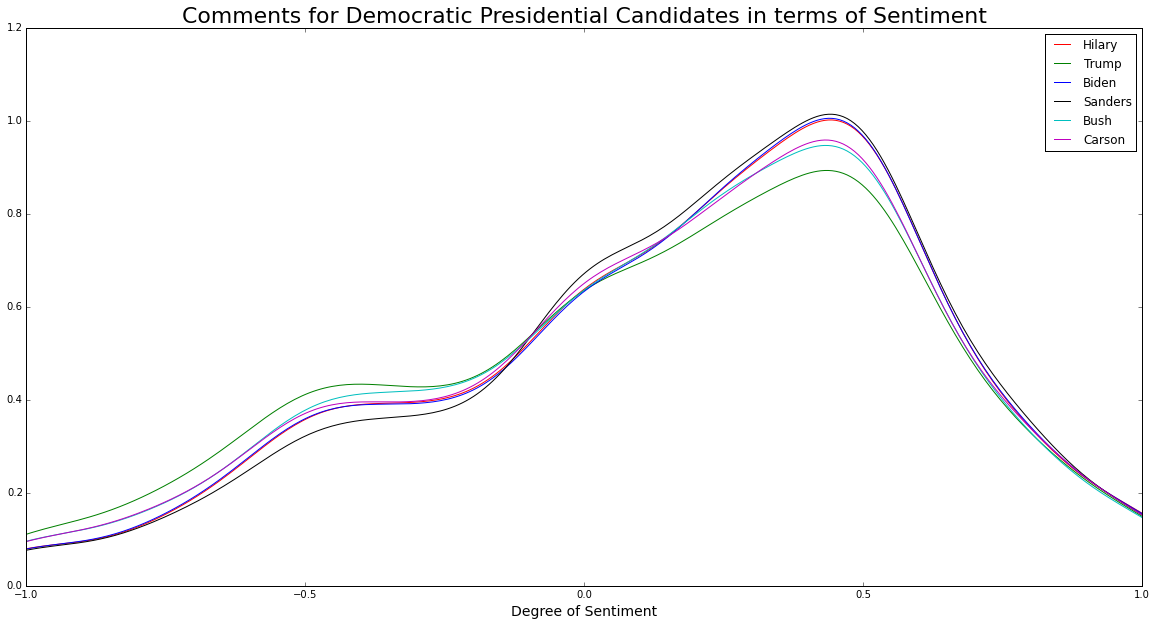

In [35]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))

metric = 'Sentiment'

data = hilary[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r', label = 'Hilary')

data = trump[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Trump')

data = biden[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Biden')

data = sanders[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'black', label = 'Sanders')

data = bush[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'c', label = 'Bush')

data = carson[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'm', label = 'Carson')
plt.xlabel('Degree of Sentiment', fontsize=14)
plt.title('Comments for Democratic Presidential Candidates in terms of Sentiment', fontsize=22)

plt.legend()


In [354]:
hilary = pd.read_csv('hilary1.csv')
trump = pd.read_csv('trump1.csv')
biden = pd.read_csv('biden1.csv')
sanders = pd.read_csv('sanders1.csv')
bush = pd.read_csv('bush1.csv')
carson = pd.read_csv('carson1.csv')


In [5]:
plt.figure(figsize=(20,10))

metric = 'Sentiment2'

data = hilary[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r', label = 'Hilary, sentence-level')

data = trump[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Trump, sentence-level')

data = biden[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Biden, sentence-level')

data = sanders[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'black', label = 'Sanders, sentence-level')

data = bush[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'c', label = 'Bush, sentence-level')

data = carson[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'm', label = 'Carson, sentence-level')
plt.xlabel('Degree of Sentiment', fontsize=14)
plt.title('Comments for Democratic Presidential Candidates in terms of Sentiment', fontsize=22)

plt.legend()
plt.show()

KeyError: 'Sentiment2'

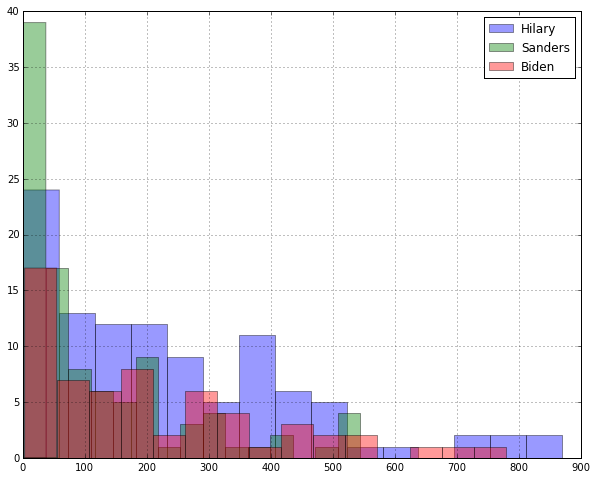

In [290]:
plt.figure(figsize=(10, 8))
# hilary.groupby('URL')[['Comment']].count().sort('Comment', ascending=False).head()
hilary.groupby('URL')['Comment'].count().hist(alpha=0.4, bins=15, label='Hilary')
sanders.groupby('URL')['Comment'].count().hist(alpha=0.4, bins=15, label='Sanders')
biden.groupby('URL')['Comment'].count().hist(alpha=0.4, bins=15, label='Biden')
plt.legend()
plt.show()

In [270]:
trump.groupby('URL')[['Comment']].count().sort('Comment', ascending=False).head()

,Comment
URL,
http://www.nytimes.com/2015/08/09/us/politics/donald-trump-disinvited-from-conservative-event-over-remark-on-megyn-kelly.html,1777
http://www.nytimes.com/2015/08/23/us/politics/why-donald-trump-wont-fold-polls-and-people-speak.html,1074
http://www.nytimes.com/2015/09/18/opinion/crazy-talk-at-the-republican-debate.html,952
http://www.nytimes.com/2015/08/09/opinion/sunday/maureen-dowd-trump-the-disrupter.html,832
http://www.nytimes.com/2015/09/17/us/politics/candidates-use-second-gop-debate-to-taunt-trump.html,757


In [271]:
sanders.groupby('URL')[['Comment']].count().sort('Comment', ascending=False).head()

,Comment
URL,
http://www.nytimes.com/2015/05/29/us/politics/bernie-sanders-campaign.html,544
http://www.nytimes.com/2015/05/17/us/politics/the-right-aims-at-democrats-on-social-media-to-hit-clinton.html,535
http://www.nytimes.com/2014/12/14/opinion/sunday/mark-bittman-is-it-bad-enough-yet.html,525
http://www.nytimes.com/2015/04/30/us/politics/bernie-sanders-campaign-for-president.html,517
http://www.nytimes.com/2010/12/09/opinion/09collins.html,475


In [272]:
biden.groupby('URL')[['Comment']].count().sort('Comment', ascending=False).head()

,Comment
URL,
http://www.nytimes.com/2015/08/02/us/politics/joe-biden-white-house-2016-presidential-campaign.html,779
http://www.nytimes.com/2015/08/28/us/politics/hillary-clintons-handling-of-email-issue-frustrates-democratic-leaders.html,719
http://www.nytimes.com/2015/08/04/opinion/david-brooks-trumps-allure-ego-as-ideology.html,649
http://www.nytimes.com/2015/09/14/opinion/charles-m-blow-bernie-sanders-and-the-black-vote.html,567
http://www.nytimes.com/2015/07/15/upshot/should-americans-work-more-to-hit-4-percent-growth-we-would-have-to.html,550


In [273]:
bush.groupby('URL')[['Comment']].count().sort('Comment', ascending=False).head()

,Comment
URL,
http://www.nytimes.com/2015/09/18/opinion/crazy-talk-at-the-republican-debate.html,952
http://www.nytimes.com/2015/07/20/us/politics/trump-refuses-to-apologize-for-comments-on-mccains-service.html,859
http://www.nytimes.com/2015/09/17/us/politics/candidates-use-second-gop-debate-to-taunt-trump.html,757
http://www.nytimes.com/2015/09/18/opinion/paul-krugman-fantasies-and-fictions-at-gop-debate.html,624
http://www.nytimes.com/2015/07/24/opinion/trump-is-the-poison-his-party-concocted.html,568


In [274]:
carson.groupby('URL')[['Comment']].count().sort('Comment', ascending=False).head()

,Comment
URL,
http://www.nytimes.com/2015/08/23/us/politics/why-donald-trump-wont-fold-polls-and-people-speak.html,1074
http://www.nytimes.com/2015/09/18/opinion/crazy-talk-at-the-republican-debate.html,952
http://www.nytimes.com/2015/09/17/us/politics/candidates-use-second-gop-debate-to-taunt-trump.html,757
http://www.nytimes.com/2015/09/08/opinion/the-anti-party-men-trump-carson-sanders-and-corbyn.html,692
http://www.nytimes.com/2015/08/20/opinion/gop-candidates-follow-trump-to-the-bottom-on-immigration.html,594
